# Q1.(a):KNN Regression model on Automobile Dataset

importing required modules

In [237]:
#IMPORTING REQUIRED MODULES(THAT ARE SPECIFIED IN THE ASSIGNMENT)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading data

In [238]:
#LOADING DATA FROM Automobile_data.csv file

df=pd.read_csv(r'c:\Users\abhis\Downloads\archive\Automobile_data.csv')

knowing the data

In [239]:
#PRINTING THE GENERAL SPECIFICATIONS OF DATA

print(df.head())
print(df.shape)
print(df.columns)

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

finding if there are null values are not in our data

In [240]:
#COUNTING THE NUMBER OF NULL VALUES IN EACH COLUMN

df.isnull().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

as you can see there are no null values in any of the columns

but we have '?' in place of the null values

we will now replace these '?' values with null values

In [241]:
#REPLACING ALL THE'?' WITH NULL VALUES

df[df=='?']=np.nan

In [242]:
#AFTER REPLACING ,NOW AGAIN COUNTING THE NUMBER OF NULL VALUES IN EACH COLUMN

df.isnull().sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

now as you can see 7 columns contain the null values

we will replace these null values with the mode of that column

In [243]:
#REPLACING THE NULL VALUES WITH THE MODE VALUE OF THAT COLUMN

for col_name in ['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm','price']:
    df[col_name].fillna(df[col_name].mode()[0],inplace=True)

In [244]:
#AFTER REPLACING NULL VALUES WITH MODE,AGAIN SEEIING WHETHER THERE ARE STILL ANY NULL VALUES
df.isnull().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

as you can see now there are no null values , as the null values are replaced by mode of there respective columns

In [245]:
#CALCULATING THE VALUE COUNTS OF 'num-of-doors' COLUMN

df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

we will now convert four and two into numeric values,as we require numeric values in regression and their conversion makes sense

In [246]:
#CONVERTING STRINGS INTO NUMBERIC VALUES

df_temp=df['num-of-doors'].map({'two':2,'four':4})
df['num-of-doors']=df_temp
df['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

as you can see we have converted them into numeric values

now we will do the same for 'num-of-cylinders' column

In [247]:
#CALCULATING THE VALUE COUNTS FOR 'num-of-cylinders' COLUMN

df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [248]:
#CONVERTING STRINGS INTO NUMERIC VALUES

df_temp=df['num-of-cylinders'].map({'four':4,'five':5,'six':6,'two':2,'three':3,'eight':8,'twelve':12})
df['num-of-cylinders']=df_temp
df['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

lets now see the correlation between the price and the numerical attributes


In [249]:
#CONVERTING COLUMNS THAT HAVE OBJECT TYPE INTO  NUMERIC TYPE

for column_name in ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']:
 df[column_name]=pd.to_numeric(df[column_name])

#SELECTING THE NUMERIC FEATURES FROM OUR DATA

numerical_features=df.select_dtypes(include=np.number)

#FINDING THE CORRELATION AMONG ALL THE NUMERIC FEATURES

correlation=numerical_features.corr()

#SELECTING ONLY THE CORREALTION BETWEEN PRICE COLUMN AND ALL OTHER NUMERIC FEATURES

num_corr=correlation['price'].sort_values(ascending=False).to_frame()

#AFTER SORTING THE CORRELATION VALUES ,PRINTING THEM

num_corr

,price
price,1.000000
engine-size,0.861769
curb-weight,0.820807
horsepower,0.759731
width,0.729009
num-of-cylinders,0.688346
length,0.682528
wheel-base,0.582915
bore,0.525878
normalized-losses,0.317097


as you can see engine-size,curb-weight,horsepower have high correlation with price 
so let us have a look at the plots corresponding with these features

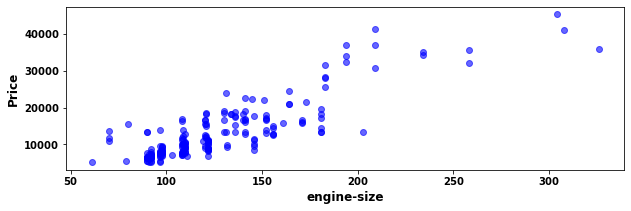

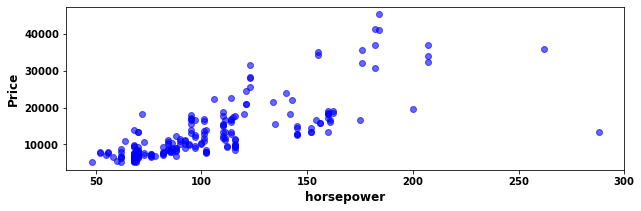

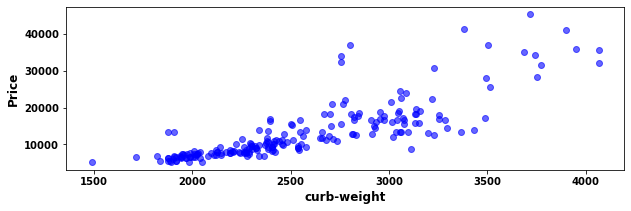

In [250]:
#PLOTTING HOW THE VALUES OF TOP CORRELATED COLUMNS TO PRICE CHANGE

for column_name in ['engine-size','horsepower','curb-weight'] :
 plt.figure(figsize=(10,3))
 plt.scatter(x=df[column_name],y=df['price'],color='blue',alpha=0.6)
 plt.xlabel(column_name,weight='bold',fontsize=12)
 plt.ylabel('Price',weight='bold',fontsize=12)
 plt.xticks(weight='bold')
 plt.yticks(weight='bold')
 plt.show()

now let us drop some of the less correlated

In [251]:
#DROPPING THE COLUMNS THAT HAVE LESS CORRELATION WITH PRICE

df=df.drop(['normalized-losses','height','stroke','compression-ratio','num-of-doors','symboling','peak-rpm','city-mpg','highway-mpg'],axis=1)
df.columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'horsepower', 'price'],
      dtype='object')

let us now drop some of the categorical variables that have large no of categories,to decrease the size of dimensions

In [252]:
#DROPPING MORE COLUMNS TO DECREASE DIMENSIONS(MENTIONED IN ASSIGNMENT THAT WE CAN DO THIS)

df=df.drop(['make', 'engine-type',  'fuel-system'],axis=1)
df.columns

Index(['fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'price'],
      dtype='object')

now let us convert the categorical features into one hot encoding

In [253]:
#CONVERTING CATEGORICAL FEATURES INTO ONE HOT ENCODINGS

df=pd.get_dummies(df,columns=['fuel-type','aspiration','body-style', 'drive-wheels',
       'engine-location'],prefix=['fueltype','aspiration','bodystyle', 'drivewheels',
       'enginelocation'])
df.columns

Index(['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'price', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'bodystyle_convertible', 'bodystyle_hardtop', 'bodystyle_hatchback',
       'bodystyle_sedan', 'bodystyle_wagon', 'drivewheels_4wd',
       'drivewheels_fwd', 'drivewheels_rwd', 'enginelocation_front',
       'enginelocation_rear'],
      dtype='object')

now let us normalize the features using min max normalization

In [254]:
#FINDING MAX VALUE OF EACH COLUMN

max_values=np.max(df)

#FINDING MIN VALUE OF EACH COLUMN

min_values=np.min(df)


In [255]:
#MIN-MAX NORMALIZATION FOR ALL COLUMNS EXCEPT PRICE COLUMN(AS IT IS THE OUTPUT )

for col_num in range(df.shape[1]):
   if col_num!=8:
        df[df.columns[col_num]]=(df[df.columns[col_num]]-min_values[col_num])/(max_values[col_num]-min_values[col_num])
print(df.head())

   wheel-base    length     width  curb-weight  num-of-cylinders  engine-size  \
0    0.058309  0.413433  0.316667     0.411171               0.2     0.260377   
1    0.058309  0.413433  0.316667     0.411171               0.2     0.260377   
2    0.230321  0.449254  0.433333     0.517843               0.4     0.343396   
3    0.384840  0.529851  0.491667     0.329325               0.2     0.181132   
4    0.373178  0.529851  0.508333     0.518231               0.3     0.283019   

       bore  horsepower  price  fueltype_diesel  ...  bodystyle_convertible  \
0  0.664286    0.262500  13495              0.0  ...                    1.0   
1  0.664286    0.262500  16500              0.0  ...                    1.0   
2  0.100000    0.441667  16500              0.0  ...                    0.0   
3  0.464286    0.225000  13950              0.0  ...                    0.0   
4  0.464286    0.279167  17450              0.0  ...                    0.0   

   bodystyle_hardtop  bodystyle_hatchb

we have noramalized all the input features 

now let us split the data into train,test,validate

In [256]:
#DATA SPLITTING

np.random.seed(1)

#TEST-TRAIN SPLIT

mask=np.random.rand(len(df))<0.8
train_df=df[mask]
test_df=df[~mask]
print(len(df))
print(len(train_df),len(test_df))

#SPLITTING TRAIN DATA AGAIN INTO TRAINFINAL AND VALIDATION

mask1=np.random.rand(len(train_df))<0.8
trainfinal_df=train_df[mask1]
valid_df=train_df[~mask1]
print(len(trainfinal_df),len(valid_df))


205
162 43
123 39


now let us define euclidean distance function

In [257]:
#FUNCTION TO CALCULATE EUCLIDEAN DISTANCE

def euclidean_distance(vector1,vector2):
    distance=np.sqrt(np.sum((np.array(vector1)-np.array(vector2))**2))
    return distance

now let us define prediction function

In [258]:
#FUNCTIN TO PREDICT THE Y VALUE BASED OF TRAIN DATA AND K VALUE

def prediction(x_train,y_train,x_input,k):
    
    #TO STORE DISTANCE FROM TEST POINT TO EACH TRAIN POINT
    
    point_distance=[] 
    
    #LOOPING THROUGH EACH TRAIN ROW AND CALCULATING DISTANCE FROM TEST POINT 
    
    for train_row in range(len(x_train)):
        distances=euclidean_distance(x_train[train_row:train_row+1],x_input)
        point_distance.append(distances)
    point_distance=np.array(point_distance)
    
    #SORTING THE POINT DISTANCES ARRAY WHILE PRESERVING THE INDICES
    
    distance=np.argsort(point_distance)[:k]
    sum=np.array([])
    
    #LOOPING THROUGH EACH OF K CLOSE NEIGHBOURS AND ADDING THEIR PRICE VALUES
    
    for i in range(k):
        index=distance[i]
        y_value=y_train[index:index+1]
        sum=np.append(sum,np.array(y_value))
    
    #RETURNING THE AVERAGE PRICE OF THE K NEAREST NEIGHBOURS
    
    return sum.sum()/k
    

now let us define rmse function to calculate Root Mean Squared Error

In [259]:
#FUNCTION TO PREDICT THE ROOT MEAN SQUARED ERROR

def rmse(train,test,k):
    
    #DIVIDING DATA INTO SEPERATE INPUT AND OUTPUT FEATURES 
    
    train_x=train[['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'bodystyle_convertible', 'bodystyle_hardtop', 'bodystyle_hatchback',
       'bodystyle_sedan', 'bodystyle_wagon', 'drivewheels_4wd',
       'drivewheels_fwd', 'drivewheels_rwd', 'enginelocation_front',
       'enginelocation_rear']]
    train_y=train[['price']]
    test_x=test[['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'bodystyle_convertible', 'bodystyle_hardtop', 'bodystyle_hatchback',
       'bodystyle_sedan', 'bodystyle_wagon', 'drivewheels_4wd',
       'drivewheels_fwd', 'drivewheels_rwd', 'enginelocation_front',
       'enginelocation_rear']]
    test_y=test[['price']]
    rmse=0
    
    #LOOPING THROUGH EACH TEST ROW AND CALCULATING THE ERROR IN PREDICTION
    
    for test_row in range(len(test_x)):
        
        #GETTING THE PREDICTED VALUE
        
        y_pred=prediction(train_x,train_y,test_x[test_row:test_row+1],k)
        
        #FINDING THE ERROR BETWEEN THE ACTUAL AND THE PREDICTED VALUE
        
        error=((y_pred-np.array(test_y[test_row:test_row+1]))**2)
        
        #ADDING ALL THE ERRORS IN PREDICTION
        
        rmse+=error
    
    #CALCULATING THE RMSE
    
    rmse=np.sqrt(rmse/len(test_x))
    return rmse

now finally let us see the validation set error by giving trainfinal_df and valid_df as inputs to the rmse function
with k value=3

In [260]:
print('VALIDATION SET PERFORMANCE USING ROOT MEAN SQUARED ERROR AND K=3 IS:',rmse(trainfinal_df,valid_df,3))

VALIDATION SET PERFORMANCE USING ROOT MEAN SQUARED ERROR AND K=3 IS: [[5259.69724492]]


# Q1(b): calculating the optimal k using cross validation

dividing the train data into 4 equal parts for 4 fold cross validation

In [261]:
#FIRST DIVING TRAIN DATA INTO 2 EQUAL PARTS

part1=train_df.sample(frac=0.5)
part2=train_df.drop(part1.index)

#NOW FURTHER DIVIDING THE DIVIDED PARTS INTO 2 SO THAT WE GET 4 PARTS

part11=part1.sample(frac=0.5)
part12=part1.drop(part11.index)
part21=part2.sample(frac=0.5)
part22=part2.drop(part21.index)
print(train_df.shape,part1.shape,part2.shape,part11.shape,part12.shape,part21.shape,part22.shape)

(162, 23) (81, 23) (81, 23) (40, 23) (41, 23) (40, 23) (41, 23)


defining cross validation function

In [262]:
#DEFINING CROSS VALIDATION FUNCTION

def cross_val(k):
    
    #CONCATENATING THREE DIFFERENT PARTS EACH TIME 
    
    train123=pd.concat([part11,part12,part21])
    train124=pd.concat([part11,part12,part22])
    train134=pd.concat([part11,part21,part22])
    train234=pd.concat([part12,part21,part22])
    
    #GIVING THE CONCATED PART AS TRAIN AND THE LEFT PART AS TEST TO RMSE METHOD
    
    rmse1=rmse(train123,part22,k)
    rmse2=rmse(train124,part21,k)
    rmse3=rmse(train134,part12,k)
    rmse4=rmse(train234,part11,k)
    
    #CALCULATING THE AVERAGE RMSE VALUE
    avgrmse=(rmse1+rmse2+rmse3+rmse4)/4
    return avgrmse
    

In [263]:
#RUNNING THE CROSS VALIDATION FOR DIFFERENT VALUES OF K AND FINDING THE BEST K VALUE

best_k=0
best_rmse=1000000
for i in range(1,50):
    avgrmse=cross_val(i)
    print('rmse for k=',i,'using 4 fold cross validation is:',avgrmse)
    if avgrmse<best_rmse:
        best_rmse=avgrmse
        best_k=i
print('OPTIMAL K VALUE USING 4 FOLD CROSS VALIDATION IS',best_k,'THE RMSE VALUE IS',best_rmse)
    

rmse for k= 1 using 4 fold cross validation is: [[4748.87107772]]
rmse for k= 2 using 4 fold cross validation is: [[5017.36153176]]
rmse for k= 3 using 4 fold cross validation is: [[5117.6382957]]
rmse for k= 4 using 4 fold cross validation is: [[4787.8969608]]
rmse for k= 5 using 4 fold cross validation is: [[4470.579109]]
rmse for k= 6 using 4 fold cross validation is: [[4276.81024396]]
rmse for k= 7 using 4 fold cross validation is: [[4405.47464891]]
rmse for k= 8 using 4 fold cross validation is: [[4596.82215305]]
rmse for k= 9 using 4 fold cross validation is: [[4698.52238769]]
rmse for k= 10 using 4 fold cross validation is: [[4879.68980719]]
rmse for k= 11 using 4 fold cross validation is: [[4942.39106301]]
rmse for k= 12 using 4 fold cross validation is: [[4818.15180244]]
rmse for k= 13 using 4 fold cross validation is: [[4744.78107561]]
rmse for k= 14 using 4 fold cross validation is: [[4783.9998165]]
rmse for k= 15 using 4 fold cross validation is: [[4819.50993751]]
rmse for 

# Q2(a):Training Decision tree on census income dataset

loading the data

In [264]:
#DATA LOADING

df=pd.read_csv(r'C:\Users\abhis\Downloads\adult.csv')

examining the data specifications

In [265]:
#PRINTING SPECIFICATIONS OF DATA

print(df.head())
print(df.shape)
print(df.columns)

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

checking if there are any null values in each column

In [266]:
#FINDING THE NO OF NULL VALUES IN EACH COLUMN

df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

As you can see there are no null values in our data
but in our data we can '?' instead of null values
now let us change these '?' values to null values

In [267]:
#CONVERTING ALL '?' TO NULL VALUES

df[df=='?']=np.nan

#FINDING THE NO OF NULL VALUES IN EACH COLUMN

df.isnull().sum(axis=0)


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

now let us replace all the null values with the mode of their columns

In [268]:
#LOOPING THROUGH EACH OF THE COLUMNS HAVING NULL VALUES

for column in['workclass','occupation','native.country']:
    
    #REPLACING THE NULL VALUE WITH THE MODE OF THAT COLUMN
    
    df[column].fillna(df[column].mode()[0],inplace=True)
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

now let us convert our output varible values '<=50K' and '>50K' to 0 and 1 respectively

In [269]:
#CONVERTIG INCOME VALUES TO 0 AND 1 

change={"income":{'<=50K':0,'>50K':1}}
df=df.replace(change)

In [270]:
#DROPPING FNLWGT COLUMN (ONLY SINGLE COLUMN) TO DECREASE THE TIME TO TRAIN DECISION TREE
df=df.drop(['fnlwgt'],axis=1)

let us now split the data intlo test train and validation sets

In [271]:
#TEST-TRAIN SPLIT

train=df.sample(frac=0.8)
test=df.drop(train.index)

#FURTHER SPLITTING TRAIN INTO TRAINFINAL AND VALID SETS

trainfinal=train.sample(frac=0.8)
valid=train.drop(trainfinal.index)
print(df.shape,train.shape,test.shape,trainfinal.shape,valid.shape)

(32561, 14) (26049, 14) (6512, 14) (20839, 14) (5210, 14)


now let us define the function to return feature type of each column

In [272]:
#DEFINING FUNCTION TO FIND THE TYPE OF FEATURES IN OUR DATA

def typeof_column(df):
    
    #TO STORE THE FEATURE TYPE OF EACH FEATURE
    
    column_types=[]
    
    #IF THE NO OF UNIQUE VALUES IN THE FEATURE<=THRESHOLD THEN IT IS A CATEGORICAL FEATURE O/W IT IS CONTINUOUS
    
    threshold=14
    
    #LOOPING THROUGH ALL THE COLUMNS
    
    for column in df.columns:
        if column!='label':
            
            #FINDING UNIQUE VALUES IN EACH COLUMNS
            
            unique_values=df[column].unique()
            first_value=unique_values[0]
            
            #ASSIGNING FEATURES TYPE INTO CONTINUOUS OR CATEGORICAL BASED ON THRESHOLD CONDITION
            
            if(len(unique_values)<=threshold)or(isinstance(first_value,str)):
                column_types.append('categorical')
            else:
                column_types.append('continuous')
    return column_types

now let us define a function to check the purity of data(if all the income values in that data have same values then the data is pure otherwise not pure)

In [273]:
#DEFINING PURITY FUNCTION (TO CHECK IF THE PASSED DATA IS PURE OR NOT)

def purity(df):
    
    #SEPERATING THE LAST COLUMN VALUES(INCOME COLUMN)
    
    label=df[:,-1]
    
    #COUNTING THE NO OF UNIQUE INCOME VALUES
    
    unique_values=np.unique(label)
    
    #IF THE UNIQUE VALUES ARE 1 THEN THE DATA IS PURE O/W NOT PURE
    
    if(len(unique_values)==1):
        return True
    else:
        return False


now let us define a function that gives the manjority of the no of income values in the passed data

In [274]:
#DEFINING CLASSIFICATION FUNCTION(TO GET THE MAJORITY INCOME VALUE IN THE PASSED DATA)

def classification(df):
    
    #SEPERATING THE INCOME VALUES
    
    label=df[:,-1]
    
    #GETTING BNO OF UNIQUE VALUES AND ALSO THE COUNT FOR EACH OF THE UNIQUE VALUES
    
    unique_values,counts_unique_values=np.unique(label,return_counts=True)
    
    #FINDING THE UNIQUE VALUE THAT HAS LARGE COUNT(MAJORITY)
    
    index=counts_unique_values.argmax()
    finalclass=unique_values[index]
    return finalclass


now let us define a function to get all the possibile values of split for each column of data

In [275]:
# DEFINING POTENTIAL SPILTS FUNCTION(RETURNS ALL THE POSSIBLE SPLIT VALUES OF EACH COLUMN)

def potential_splits(df):
    potential_splits={}
    
    #GETTING NO OF COLUMNS VALUE
    
    _,columns=df.shape
    
    #LOOPING THROUGH EACH OF THE COLUMN
    
    for col_no in range(columns-1):
        
        #GETTING ALL THE VALUES OF THAT COLUMN
        
        values=df[:,col_no]
        
        #GETTING ALL THE UNIQUE VALUES OF THAT COLUMN
        
        unique_values=np.unique(values)
        
        #FINDING THE FEATURE TYPE OF THE COLUMN
        
        column_type=feature_types[col_no]
        
        # IF THE FEATURE TYPE IS CONTINUOUS WE TAKE ALL THE ADJACENT PAIR OF UNIQUE VALUES AND FIND THEIR AVG 
        #NEXT WE ADD THIS AVG AS A POSSIBLE SPLIT TO THAT COLUMN
        
        if column_type=='continuous':
            potential_splits[col_no]=[]
            for i in range(len(unique_values)):
                if i!=0:
                    current_value=unique_values[i]
                    last_value=unique_values[i-1]
                    
                    #GETTING THE AVG OF CURRENT AND THE PREVIOUS UNIQUE VALUE
                    
                    potential_split=(current_value+last_value)/2
                    
                    #ADDING THE AVG VALUE AS A POSSIBLE SPLIT
                    
                    potential_splits[col_no].append(potential_split)
        
        # IF THE FEATURE IS CATEGORICAL AND NO OF UNIQUE VALUES OF THAT FEATURE IS >1
        #WE SIMPLY ASSIGN EACH OF THE UNIQUE VALUES AS A POSSIBLE SPLIT TO THAT COLUMN
        
        elif len(unique_values)>1:
            potential_splits[col_no]=unique_values
    return potential_splits


now let us define a function that splits the data based on the split_column and split_value

In [276]:
#DEFINING SPLIT DATA FUNCTION(TO SPLIT THE DATA BASED ON THE COLUMN NUMBER AND THE VALUE OF THAT COLUMN PASSED)
def split_data(df,split_column,split_value):
    
    #GETTING THE VALUES OF THE PASSED COLUMN
    
    split_column_values=df[:,split_column]
    
    #GETTING THE FEATURE TYPE OF THE PASSED COLUMN
    
    feature_type=feature_types[split_column]
    
    #BASED ON THE FEATURE TYPE ,SEPERATELY SPLITTING DATA BASED ON THE SPLIT_VALUE PASSED
    
    if feature_type=='continuous':
        data_below=df[split_column_values<=split_value]
        data_above=df[split_column_values>split_value]
    else:
        data_below=df[split_column_values==split_value]
        data_above=df[split_column_values!=split_value]
    return data_below , data_above

now lt us define a function to get the entropy

In [277]:
#DEFINING ENTROPY FUNCTION

def entropy(df):
    
    #SEPERATING THE LAST COLUMN(INCOME) VALUES
    
    label=df[:,-1]
    
    #GETTING THE COUNTS FOR EACH OF THE UNIQUE VALUES
    
    _,counts=np.unique(label,return_counts=True)
    
    #CALCULATING ENTROPY
    
    probabilities=counts/counts.sum()
    entropy=sum(probabilities*-np.log2(probabilities))
    return entropy

let us define a function to calculate the total entropy

In [278]:
#DEFINING TOTAL ENTROPY FUNCTION

def total_entropy(data_below,data_above):
    n=len(data_below)+len(data_above)
    
    #ADDING THE TOTAL ENTROPY CAPUTRED BY DATA_BELOW AND DATA_ABOVE
    
    te=((len(data_below)/n)*entropy(data_below)+(len(data_above)/n)*entropy(data_above))
    return te

now let us define a function to find the best split among all the possible splits

In [279]:
#DEFINING BEST SPLIT FUNCTION TO FIND THE BEST SPLIT

def best_split(df,potential_splits):
    overall_entropy=10000
    
    #LOOPING THROUGH ALL COLUMNS 
    
    for col_index in potential_splits:
        
        #LOOPING THROUGH ALL POSSIBLE SPLITS OF THAT COLUMN
        
        for value in potential_splits[col_index]:
            
            #SPLITTING THE DATA BASED ON THE SPLIT VALUE
            
            data_below,data_above=split_data(df,col_index,value)
            
            #CALCULATING TOTAL ENTROPY OF THE SPLIT
            
            current_entropy=total_entropy(data_below,data_above)
            
            #AS WE KNOW INFORMATION GAIN IS INVERSILY PROPORTIONAL TO  THE TOTAL_ENTROPY CAPTURED BY THE SPLIT
            #FINDING THE SPLIT THAT HAS MIN OVERALL_ENTROPY AMONG ALL SPLITS
            
            if current_entropy<=overall_entropy:
                overall_entropy=current_entropy
                best_split_column=col_index
                best_split_value=value
    return best_split_column,best_split_value

now let us define our main function decision tree to build the tree

In [280]:
#DEFINING DT  FUNCTION TO BUILD THE DECISION TREE

def dt(df,counter=0,min_samples=2,max_depth=5):
    
    if counter==0:
        global feature_types,column_headers
        
        #GETTING ALL COLUMN NAMES
        
        column_headers=df.columns
        
        #GETTING ALL COLUMN TYPES
        
        feature_types=typeof_column(df)
        data=df.values
    else:
        data=df
    
    #BASE CONDITION(RETURN IF MAX DEPTH OR MIN SAMPLES OR A COMPLETELY PURE NODE IS REACHED)
    
    if (len(data)<min_samples)or(counter==max_depth)or(purity(data)):
        
        #GETTING THE MAJORITY CLASS OF THAT NODE(DATA)
        
        final_class=classification(data)
        return final_class
    else:
        counter+=1
        
        #GETTING ALL THE POSSIBLE SPLITS
        
        p_splits=potential_splits(data)
        
        #FINDING THE BEST SPLIT AMONG ALL THE POSSIBLE SPLITS
        
        split_column,split_value=best_split(data,p_splits)
        
        #DIVIDING THE DATA BASED ON THE BEST SPLIT
        
        data_below,data_above=split_data(data,split_column,split_value)
        
        #GETTING THE FEATURE TYPE AND THE FEATURE NAME OF THE BEST SPLIT COLUMN
        
        feature_name=column_headers[split_column]
        feature_type=feature_types[split_column]
        
        #BULIDING A TREE USING DICTIONARY
        
        if feature_type=='continuous':
            question="{} <= {}".format(feature_name,split_value)
        else:
            question="{} = {}".format(feature_name,split_value)
        
        #RECURSIVE PART
        
        sub_tree={question:[]}
        yes=dt(data_below,counter,min_samples,max_depth)
        no=dt(data_above,counter,min_samples,max_depth)
        if yes==no:
            sub_tree=yes
        else:
            sub_tree[question].append(yes)
            sub_tree[question].append(no)
        return sub_tree
    
    

now let us train the decision tree using trainfinal data and max_depth=3

In [281]:
#TRAINING THE DECISION TREE USING TRAINFINAL DATA AND MAX DEPTH=3
tree=dt(trainfinal,max_depth=3)

In [282]:
print(tree)

{'marital.status = Married-civ-spouse': [{'capital.gain <= 5095.5': [{'education.num <= 12.5': [0, 1]}, 1]}, {'capital.gain <= 7073.5': [0, 1]}]}


now let us define a function that gives us the income prediction when given a test point and decision tree

In [283]:
#DEFINING TEST ROW FUNCTION TO PREDICT INCOME FROM THE TEST POINT AND DECISION TREE

def test_row(row,tree):
    
    #GETTING THE OUR DECISION NODE DETAILS:FEATURE_NAME,FEATURE_VALUE
    
    question=list(tree.keys())[0]
    feature_name,comparision_operator,value=question.split()
    
    #GETTING THE INDEX OF THE FEATURE_NAME
    
    for i in range(len(column_headers)):
        if column_headers[i]==feature_name:
            index=i
            
    #CHECKING IF THE FEATURE IS CONTINUOUS OR NOT
    
    if feature_types[index]=='continuous':
        
        #CHECKING THE NODE CONDITION WITH OUR TEST DATA POINT AND ASSIGNING SUBTREE BASED ON CONDITION TO answer
        
       if float(row[feature_name])<=float(value):
          answer=tree[question][0]
       else:
          answer=tree[question][1]
        
       #BASE CONDITION
    
       if not isinstance(answer,dict):
          return answer
       
       #RECURSIVE PART
        
       else:
          residual_tree=answer
          return test_row(row,residual_tree)
    else:
        if str(row[feature_name])==value:
            answer=tree[question][0]
        else:
            answer=tree[question][1]
        if not isinstance(answer,dict):
            return answer
        else:
            residual_tree=answer
            return test_row(row,residual_tree)
            
    

now let us define accuracy function to calculate accuracy

In [284]:
#DEFINING ACCURACY FUNCTION TO CALCULATE ACCURACY

def accuracy(df,tree):
    
    #GETTING PREDICTIONS OF TEST DATA
    
    df['prediction']=df.apply(test_row,axis=1,args=(tree,))
    
    #FINDING WHETHER THE PREDICTIONS ARE CORRECT OR NOT
    
    df['correct']=(df['prediction']==df['income'])
    
    #GETTING THE ACCURACY
    
    accuracy=df['correct'].mean()
    a=float(accuracy)
    return a
        
    

In [285]:
print('ACCURACY OF OUR BULIT DECISION TREE WITH DEPTH=3 ON VALIDATION SET IS:',accuracy(valid,tree)*100,'%')

ACCURACY OF OUR BULIT DECISION TREE WITH DEPTH=3 ON VALIDATION SET IS: 84.74088291746641 %


# Q2(b):Optimizing tree hyperparameters using cross validation

let us first divide the train data into 4 euqal sets for 4 fold cross validation

In [286]:
#SPLITTING TRAIN DATA INTO 2 EQUAL PARTS

part1=train.sample(frac=0.5)
part2=train.drop(part1.index)

#FURTHER SPLITTING THE SPLIT DATA INTO 2 PARTS SO THAT WE GET TOTAL 4 PARTS

part11=part1.sample(frac=0.5)
part12=part1.drop(part11.index)
part21=part2.sample(frac=0.5)
part22=part2.drop(part21.index)

#CONCATINATING 3 DIFFERT PARTS EACH TIME  TO CREATE 4 DIFF TRAINING DATA FOR 4 FOLD CROSS VALIDATION AND WE USE THE 
#REMAINING PART FOR VALIDATING

train123=pd.concat([part11,part12,part21])
train124=pd.concat([part11,part12,part22])
train134=pd.concat([part11,part21,part22])
train234=pd.concat([part12,part21,part22])

#PRINTING THE SHAPES OF THE TRAIN DATA AND THE 4 PARTS THAT ARE DIVIDED FROM TRAIN DATA
print(train.shape,part11.shape,part12.shape,part21.shape,part22.shape)

(26049, 14) (6512, 14) (6512, 14) (6512, 14) (6513, 14)


now let us define a function to implement cross validation

In [287]:
#DEFINING CROSS VALIDATION FUNCTION

def cross_val(i,j):
    
    
    #BUILDING TREE1 FROM TRAIN123 AND GETTING ACCURACY FOR PART22 ON TREE1
    
    tree1=dt(train123,max_depth=i,min_samples=j)
    acc1=accuracy(part22,tree1)
    
    #BUILDING TREE2 FROM TRAIN124 AND GETTING ACCURACY FOR PART21 ON TREE2
    
    tree2=dt(train124,max_depth=i,min_samples=j)
    acc2=accuracy(part21,tree2)
    
    #BUILDING TREE3 FROM TRAIN134 AND GETTING ACCURACY FOR  PART12 ON TREE3
    
    tree3=dt(train134,max_depth=i,min_samples=j)
    acc3=accuracy(part12,tree3)
    
    #BUILDING TREE4 FROM TRAIN234 AND GETTING ACCURACY FOR PART11 IN TREE4
    
    tree4=dt(train234,max_depth=i,min_samples=j)
    acc4=(accuracy(part11,tree4))
    
    #CALCULATING THE AVERAGE ACCURACY
    
    avgacc=(acc1+acc2+acc3+acc4)/4
    print('avgacc for max depth',i,'and min_samples',j,'is',avgacc*100,'%')
    return avgacc
    

now let us do hyperparameter optimization using 4 fold cross validation

In [289]:
#HYPERPARAMETERS(MAX_DEPTH,MIN_SAMPLES) OPTIMIZATION

max_accuracy=0

#LOOPING THROUGH VARIOUS MAX_DEPTH VALUES

for j in[200,500,1000]:
    
    #LOOPING THROUGH VARIOUS MIN_SAMPLE VALUES
    
    for i in[3,5,7]:
        current_acc=cross_val(i,j)
        
        #FINDING THE PARAMETERS THAT GIVE MAX_ACCURACY
        
        if current_acc>=max_accuracy:
            max_accuracy=current_acc
            optimal_max_depth=i
            optimal_min_samples=j
print('THE OPTIMAL PARAMETERS FOUND IN 4 FOLD CROSS VALIDATION ARE: MAX_DEPTH=',optimal_max_depth,'MIN_SAMPLES=',optimal_min_samples)
print('THESE OPTIMAL HYPERPARAMETERS GIVE AN ACCURACY OF:',max_accuracy*100,'%')

avgacc for max depth 3 and min_samples 200 is 84.41012336034791 %
avgacc for max depth 5 and min_samples 200 is 84.924536440255 %
avgacc for max depth 7 and min_samples 200 is 85.34298465061939 %
avgacc for max depth 3 and min_samples 500 is 84.41012336034791 %
avgacc for max depth 5 and min_samples 500 is 84.924536440255 %
avgacc for max depth 7 and min_samples 500 is 85.17023432816846 %
avgacc for max depth 3 and min_samples 1000 is 84.41012336034791 %
avgacc for max depth 5 and min_samples 1000 is 84.92069737391593 %
avgacc for max depth 7 and min_samples 1000 is 85.14720051958076 %
THE OPTIMAL PARAMETERS FOUND IN 4 FOLD CROSS VALIDATION ARE: MAX_DEPTH= 7 MIN_SAMPLES= 200
THESE OPTIMAL HYPERPARAMETERS GIVE AN ACCURACY OF: 85.34298465061939 %
